In [56]:
import timeit
import math

# Numerical Differentiation

###### This section will show the implementation of the numerical differentiation in two methods, the two-points method, and the three-points methods

## Two-points method
The equation that we want to configure is described as
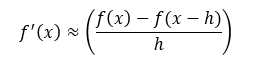
We want to calculate the approximate derivative of the function based on the change between two points (Numerically)

## Three-points method
The equation that we want to configure is described as
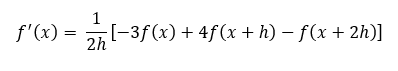
Our goal is to calculate the approximate derivative of the function based on the change between three points (Numerically)

### Note that:
In both methods, the value that you want to calculate should be the middle value(in odd size) or the ceil of the average of even-sized array

In [49]:
class Derivative:
    def __init__(self, data=None):
        self.data = data
        self.is_accepted_2pnts = False
        self.is_accepted_3pnts = False
        self._configure_acceptance()
    def _configure_acceptance(self):
        if self.data == None:
            return
        elif len(self.data)>=2:
            self.is_accepted_2pnts = True
        if len(self.data)>=3:
            self.is_accepted_3pnts = True
    def differentiate_2pnts(self,func_address):
        if not self.is_accepted_2pnts:
            raise ValueError("array size less than 2")
        middle_val = self._get_centered_val()
        foreval = self.data[self.data.index(middle_val)-1]
        h = middle_val-foreval
        return (func_address(middle_val)-func_address(foreval))/h
    def differentiate_3pnts(self,func_address):
        if not self.is_accepted_3pnts:
            raise ValueError("array size less than 3")
        middle_val = self._get_centered_val()
        nxtval = self.data[self.data.index(middle_val)+1] 
        h = nxtval-middle_val
        anxtval = middle_val+2*h
        return (1/(2*h))*(-3*func_address(middle_val)+4*func_address(nxtval)-func_address(anxtval))
    def _get_centered_val(self):
        return self.data[math.floor(len(self.data)/2)]

In [63]:
diff = Derivative([1,2,3,4])
print("Analytical value:",6)
print("2-pnts:",diff.differentiate_2pnts(lambda x:x**2))
print("3-pnts:",diff.differentiate_3pnts(lambda x:x**2))
print("################################################")
%timeit diff.differentiate_2pnts(lambda x:x**2)
%timeit diff.differentiate_3pnts(lambda x:x**2)

Analytical value: 6
2-pnts: 5.0
3-pnts: 6.0
################################################
1.35 µs ± 22.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.79 µs ± 33.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Hence, we conclude that the more the pnts used in the numerical method, the better gets the accuracy